In [43]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\test.csv")


# Select numeric columns and drop non-numeric columns
X = data.select_dtypes(include=[float, int])
X = X.drop(columns=['Id'])  # You may want to drop 'Id' if it's not needed

# Handle missing values by imputing with the median
X = X.fillna(X.median())

# Remove rows with infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

Y = data['MoSold']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create a model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary(),data.shape)

                            OLS Regression Results                            
Dep. Variable:                 MoSold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.195e+27
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:54:40   Log-Likelihood:                 39249.
No. Observations:                1459   AIC:                        -7.843e+04
Df Residuals:                    1423   BIC:                        -7.824e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           9.18e-12   2.12e-11      0.433

In [2]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1459
Number of columns: 80


In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

                            OLS Regression Results                            
Dep. Variable:                     Id   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     30.57
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.81e-08
Time:                        11:34:53   Log-Likelihood:                -10872.
No. Observations:                1459   AIC:                         2.175e+04
Df Residuals:                    1457   BIC:                         2.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2054.5724     26.817     76.614      0.0

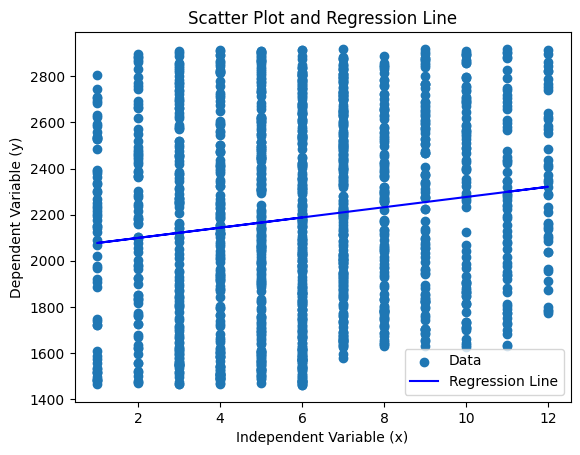

In [15]:
X = data['MoSold']
Y = data['Id']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create a model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())
plt.scatter(X['MoSold'], Y, label="Data")
plt.plot(X['MoSold'], results.predict(X), color='blue', label="Regression Line")
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.title("Scatter Plot and Regression Line")
plt.legend()
plt.show()

In [16]:
import numpy as np
df = pd.DataFrame(data)

# View the original DataFrame
print("Original DataFrame:")
print(df)

# Specify the column to fill and the fill_value
column_to_fill = 'Alley'  # We want to fill missing values in the 'Age' column
fill_value = 'pass'  # Fill missing 'Age' values with 30

# Fill missing values in the specified column
df[column_to_fill] = df[column_to_fill].fillna(fill_value).copy()

# View the DataFrame after filling missing values
print("\nDataFrame after filling missing values:")
print(df)

Original DataFrame:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ...

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\test.csv")

# Filter and select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
df.table()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'table'

In [30]:
qualitative_data = df.select_dtypes(exclude=['int64', 'float64'])
qualitative_count = len(qualitative_data.columns)
nominal_data = qualitative_data.select_dtypes(include=['object'])
nominal_count = len(nominal_data.columns)
print("\nb. Count of Data Types:")
print(f"Quantitative (Numerical) Data: {quantitative_count} columns")
print(f"Qualitative (Non-Numerical) Data: {qualitative_count} columns")
print(f"Nominal Data (Categorical): {nominal_count} columns")


b. Count of Data Types:
Quantitative (Numerical) Data: 37 columns
Qualitative (Non-Numerical) Data: 43 columns
Nominal Data (Categorical): 43 columns


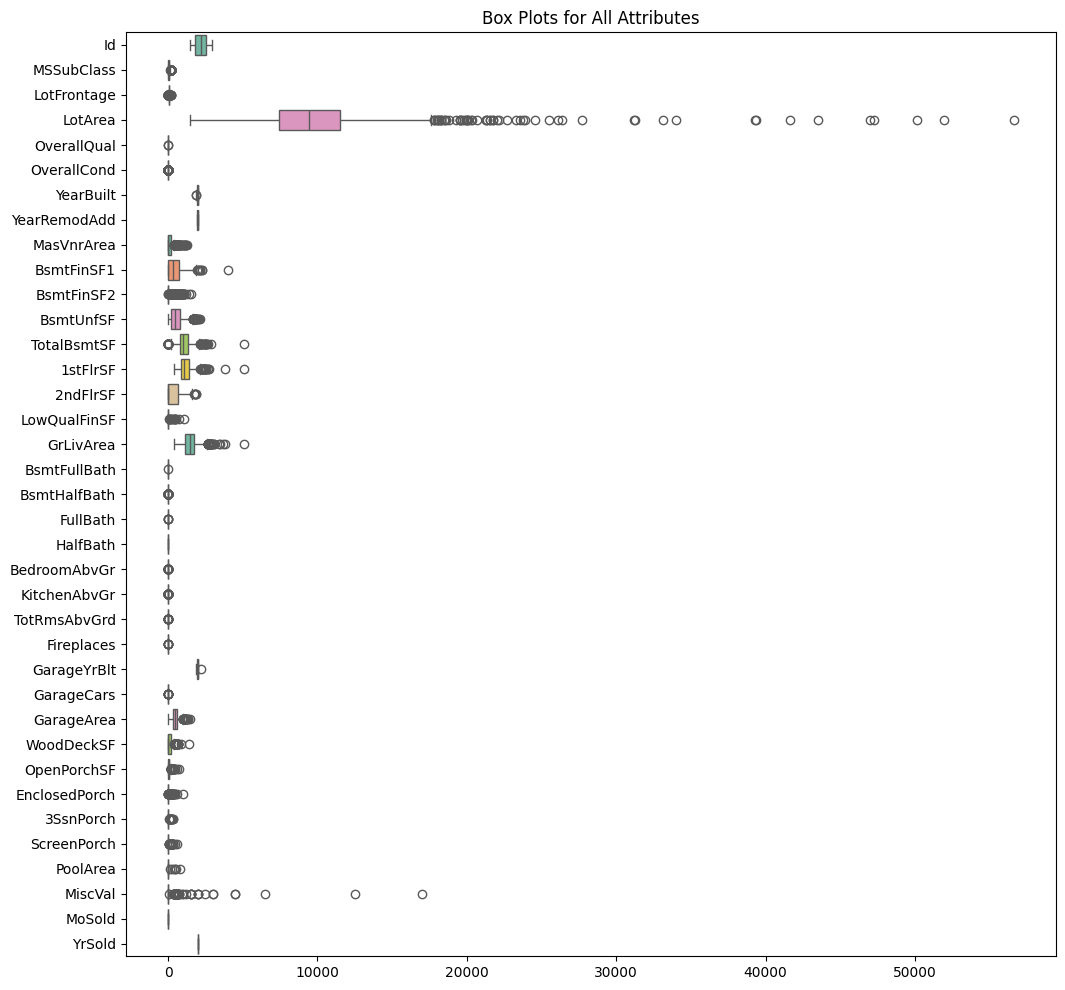

In [25]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Box Plots for All Attributes")
plt.xticks(ticks=[10000 * i for i in range(6)], labels=[str(10000 * i) for i in range(6)])
plt.show()

In [28]:
# Define a function to remove outliers
def remove_outliers(df, col_name, threshold=1.5):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

# Example of removing outliers from a specific column (e.g., 'LotArea')
col_name_remove = 'LotArea'
threshold_remove = 1.5

print(f"Before removing outliers in '{col_name_remove}':")
print(data[col_name_remove].describe())

data_no_outliers = remove_outliers(data, col_name_remove)

print(f"After removing outliers in '{col_name_remove}':")
print(data_no_outliers[col_name_remove].describe())

# 2. Transform data to reduce skewness
# You can apply log transformation, square root, or other transformations to make data less skewed.

# Example of applying a log transformation to a column (e.g., 'SalePrice')
col_name_transform = 'OverallCond'

print(f"Before transforming data in '{col_name_transform}':")
print(data[col_name_transform].describe())

data[col_name_transform] = data[col_name_transform].apply(lambda x: np.log(x) if x > 0 else 0)

print(f"After transforming data in '{col_name_transform}':")
print(data[col_name_transform].describe())

# 3. Impute outliers
# You can impute outliers with a specific value (e.g., the median).

# Example of imputing outliers with the median in a specific column (e.g., 'SalePrice')
col_name_impute = 'OverallCond'
threshold_impute = 1.5

print(f"Before imputing outliers in '{col_name_impute}':")
print(data[col_name_impute].describe())

q1 = data[col_name_impute].quantile(0.25)
q3 = data[col_name_impute].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - threshold_impute * iqr
upper_bound = q3 + threshold_impute * iqr

median_col = data[col_name_impute].median()
data[col_name_impute] = data[col_name_impute].apply(lambda x: median_col if x < lower_bound or x > upper_bound else x)

print(f"After imputing outliers in '{col_name_impute}':")
print(data[col_name_impute].describe())

Before removing outliers in 'LotArea':
count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64
After removing outliers in 'LotArea':
count     1399.000000
mean      9152.258041
std       3270.577958
min       1470.000000
25%       7269.000000
50%       9240.000000
75%      11082.000000
max      17597.000000
Name: LotArea, dtype: float64
Before transforming data in 'OverallCond':
count    1459.000000
mean        5.553804
std         1.113740
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
After transforming data in 'OverallCond':
count    1459.000000
mean        1.692574
std         0.220764
min         0.000000
25%         1.609438
50%         1.609438
75%         1.791759
max         2.197225
Name: OverallCond, dtype: float64
Before imputing outlie

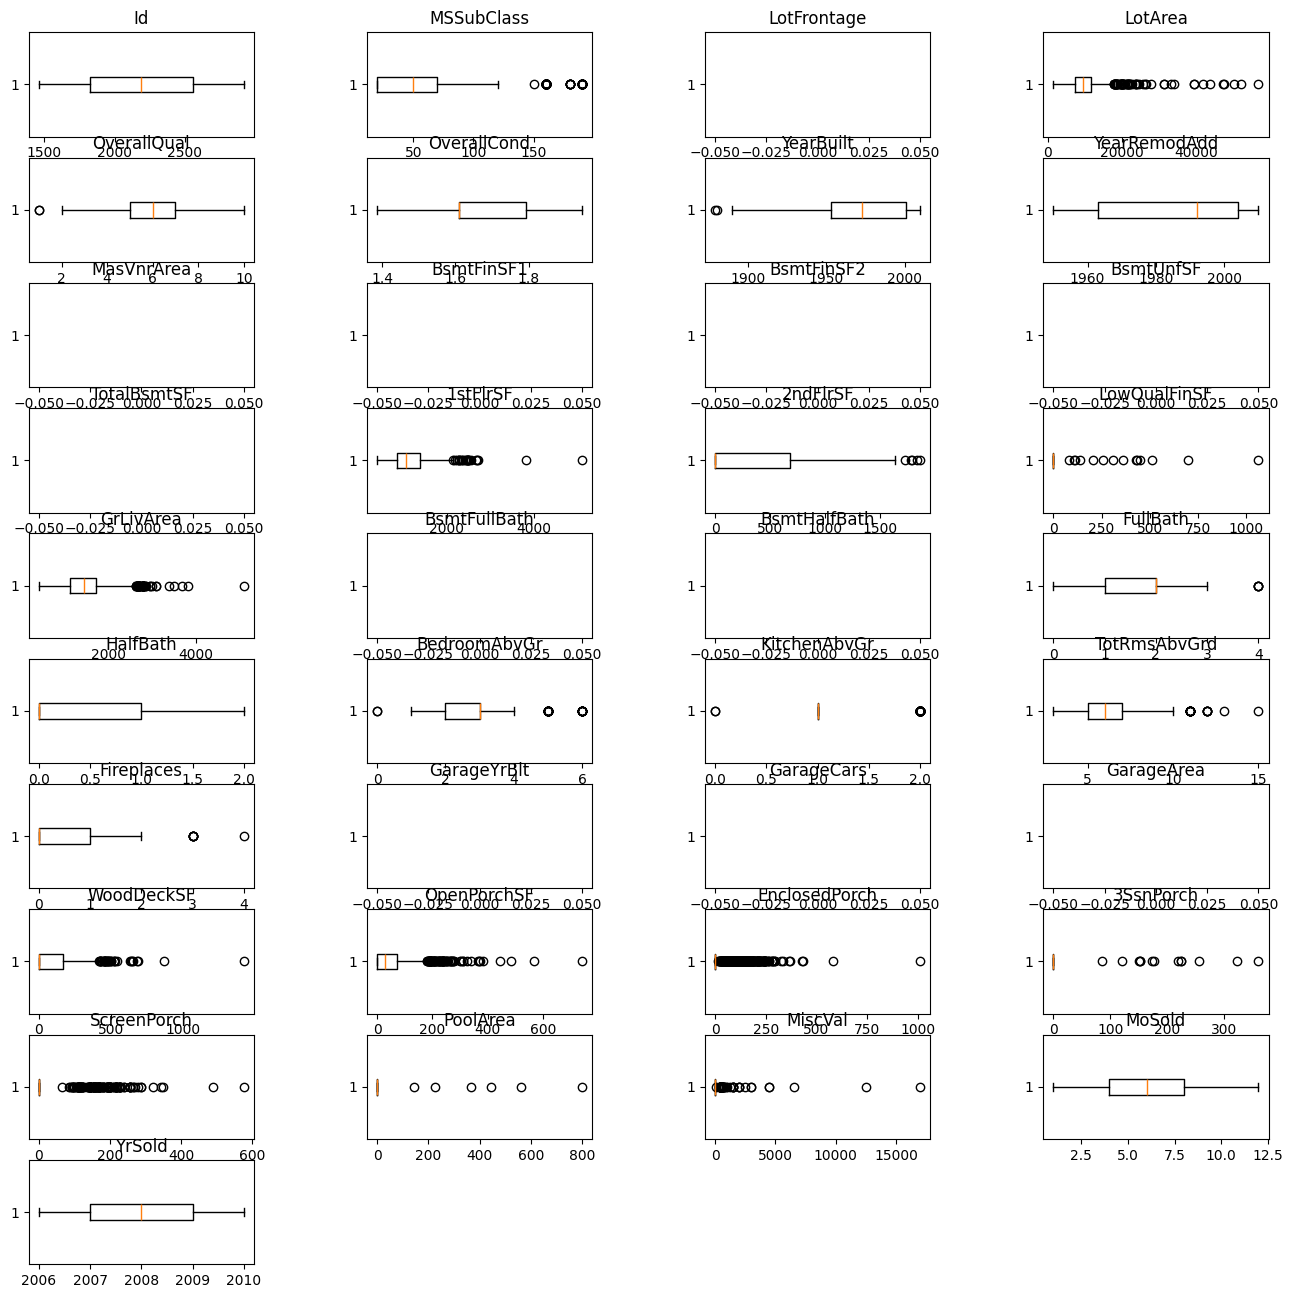

In [34]:
num_cols = data.select_dtypes(include=[np.number]).columns
n_cols = len(num_cols)
n_rows = n_cols // 4 + (n_cols % 4 > 0)

plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, 4, i + 1)
    plt.boxplot(data[col], vert=False)
    plt.title(col)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [58]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\test.csv")

# Select numeric columns and drop non-numeric columns
X = data.select_dtypes(include=[float, int])
X = X.drop(columns=['MoSold'])  # You may want to drop 'Id' if it's not needed

# Handle missing values by imputing with the median
X = X.fillna(X.median())

# Remove rows with infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

Y = data['MoSold']

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Create a model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 MoSold   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.873
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           6.44e-08
Time:                        14:43:56   Log-Likelihood:                -3481.2
No. Observations:                1459   AIC:                             7034.
Df Residuals:                    1423   BIC:                             7225.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2478.2119    535.108      4.631

In [60]:
from statsmodels.api import OLS
import pandas as pd

# Load your dataset
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\test.csv")

# Select numeric columns and drop non-numeric columns
X = data.select_dtypes(include=[float, int])
X = X.drop(columns=['Id'])  # You may want to drop 'Id' if it's not needed

# Handle missing values by imputing with the median
X = X.fillna(X.median())

# Remove rows with infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

Y = data['MoSold']

# Create an OLS model
model = OLS(Y, X)

# Fit the model
results = model.fit()

# Extract p-values and filter those less than 0.05
significant_p_values = results.pvalues[results.pvalues < 0.05]

# Print significant p-values
print("Significant p-values:")
print(significant_p_values)


Significant p-values:
LotFrontage     3.131261e-03
LotArea         1.134265e-02
YearBuilt       4.596979e-71
YearRemodAdd    8.740293e-48
MasVnrArea      3.230754e-02
1stFlrSF        0.000000e+00
2ndFlrSF        0.000000e+00
LowQualFinSF    0.000000e+00
GrLivArea       0.000000e+00
GarageYrBlt     2.629237e-97
GarageArea      1.042962e-02
WoodDeckSF      3.242176e-03
OpenPorchSF     4.985384e-06
MoSold          0.000000e+00
YrSold          8.367630e-66
dtype: float64
